dataset/Geolife Trajectories 1.3/Data/000/Trajectory/20081023025304.plt


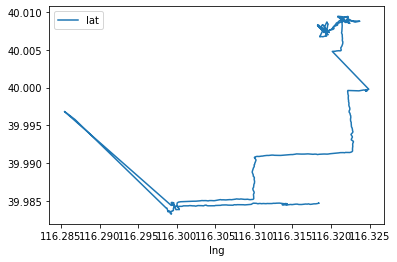

In [1]:
from load import *

dataset_path = 'dataset/Geolife Trajectories 1.3/Data/'
for df in LoadG(dataset_path):
    df.plot(x='lng', y='lat')
    break


In [2]:
from DPC import DPCLink
dpc = DPCLink(df)


In [3]:
dpc.calDis()


In [16]:
dpc.calDc(p=0.97)


[2.44106771e-103 8.68154846e-090 9.01291660e-082 ... 1.00000000e+000
 1.00000000e+000 1.00000000e+000]
dc: 0.47281095772144993


<AxesSubplot:ylabel='Frequency'>

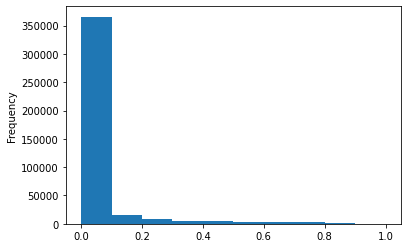

In [14]:
tmp = np.tril(dpc.dis)
tmp = tmp.ravel()
tmp = tmp[np.where(tmp)]
tmp = np.sort(tmp)
tmp=pd.Series(tmp)
tmp.plot.hist(bins=10)

<AxesSubplot:xlabel='lng', ylabel='lat'>

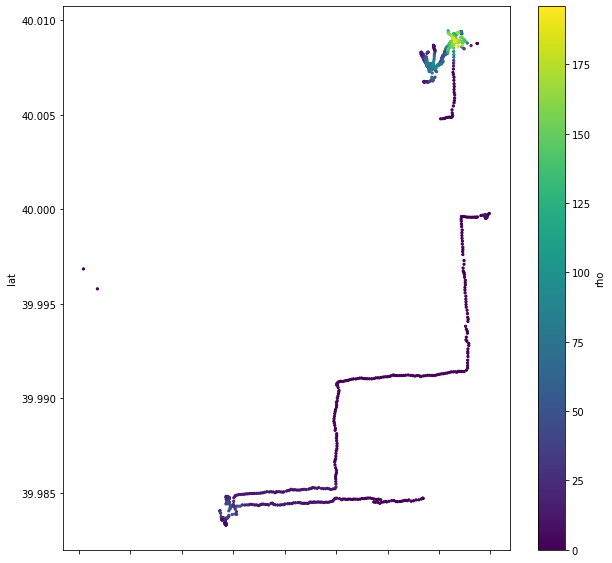

In [19]:
dpc.calRho(dc=0.3)
dpc.calDel()
dpc.df.plot.scatter(x='lng', y='lat', c='rho', colormap='viridis', s=5, figsize=(10, 10))


In [118]:
# i=iter(list(range(dpc.df.shape[0])))
jt = iter(list(range(dpc.df.shape[0])))


5.428587984566566e-08


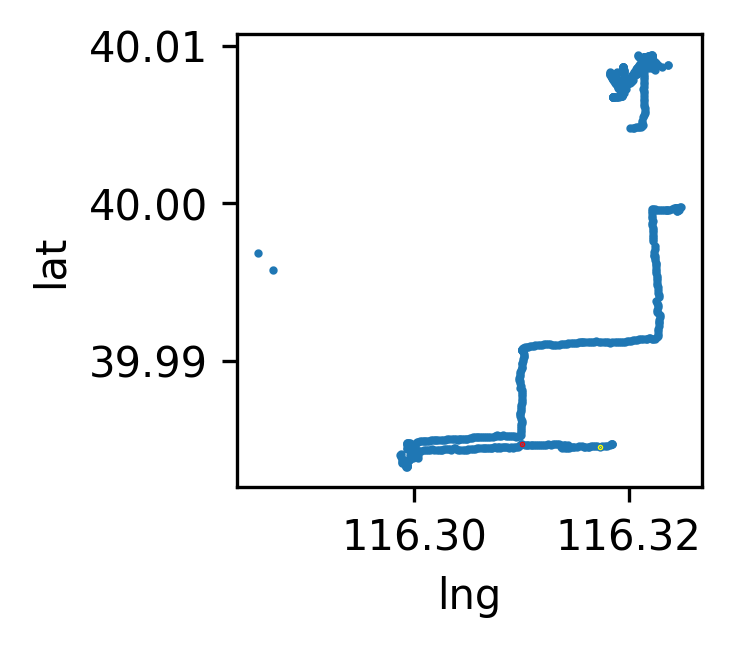

In [127]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2, 2), dpi=300)
dpc.df.plot.scatter(x='lng', y='lat', s=1, ax=ax)

i = 50
j = next(jt)
print(dpc.dis[i, j])
ax.scatter(dpc.df.loc[i, 'lng'], dpc.df.loc[i, 'lat'], c='red', s=0.1)
ax.scatter(dpc.df.loc[j, 'lng'], dpc.df.loc[j, 'lat'], c='yellow', s=0.1)


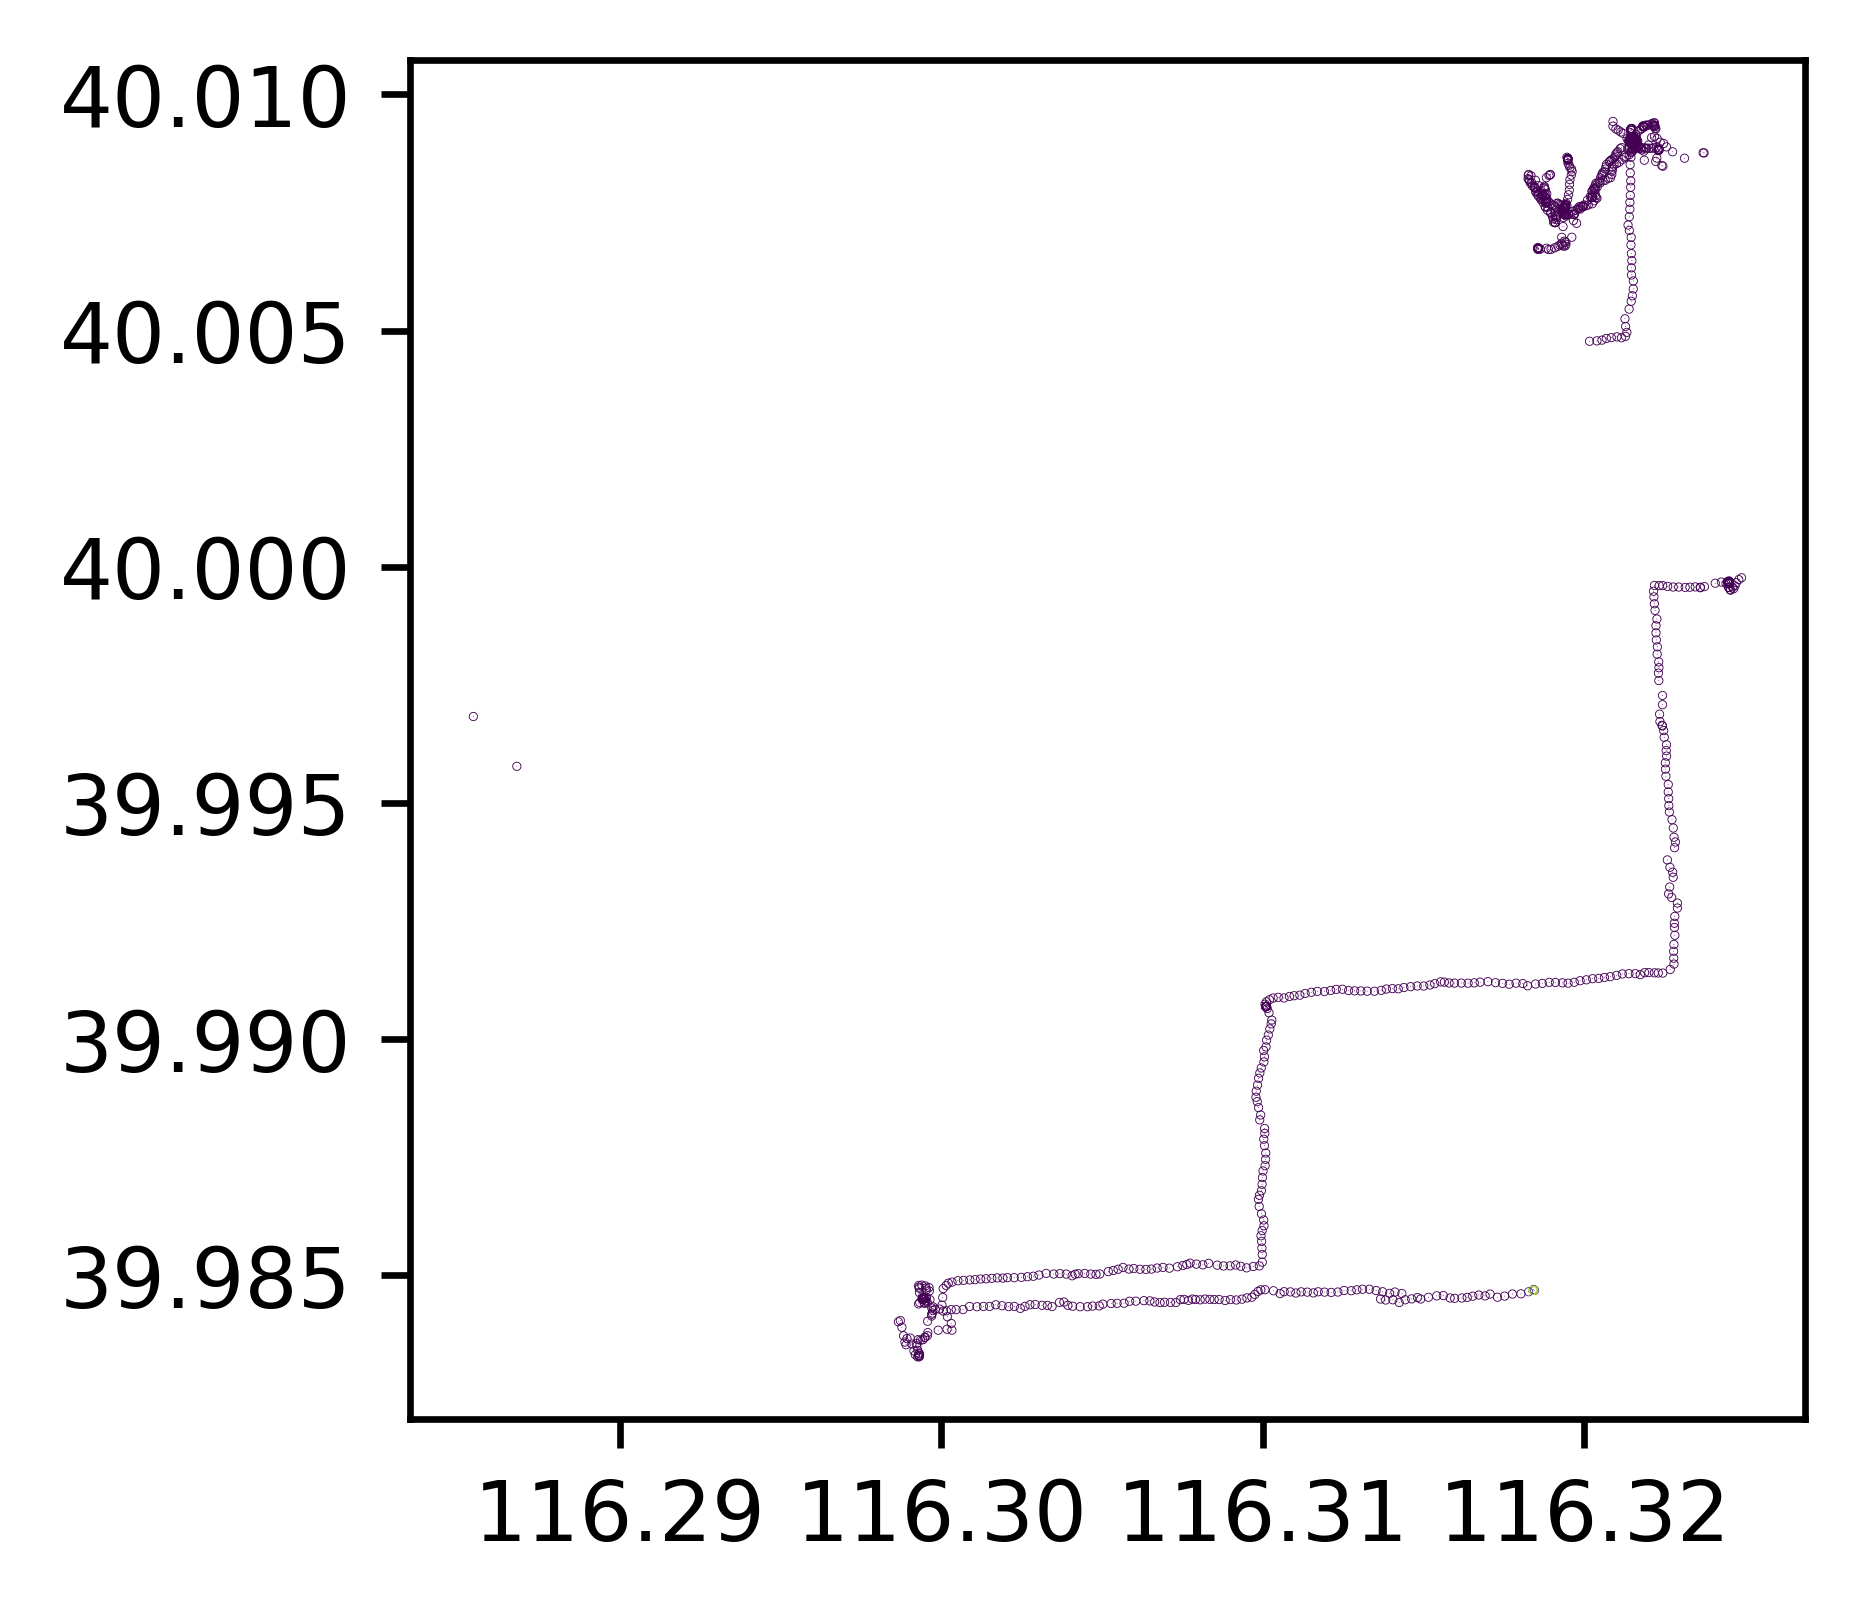

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(3, 3), dpi=600)
xs = []
ys = []
cs = []
for (i, x, y), (c) in zip(dpc.df[['lng', 'lat']].itertuples(), dpc.dis[0]):
    xs.append(x)
    ys.append(y)
    cs.append(c)

ax.scatter(xs, ys, c=cs, s=0.01)


In [9]:
import folium
from folium.plugins import HeatMap

locations_raw = [[lat, lng, datetime] for [lat, lng, datetime] in df.values]
locations = [[lat, lng] for [lat, lng, _] in df.values]

m = folium.Map(location=locations[0], zoom_start=13)
HeatMap(locations).add_to(m)
folium.PolyLine(locations).add_to(m)

for p in locations_raw:
    folium.Marker([p[0], p[1]],
                  icon=folium.Icon(color="red"),
                  tooltip="Click me!",
                  popup="<i>" + 'lat: ' + str(p[0]) + ', lng: ' + str(p[1]) + ', datetime: ' + str(p[2]) + "</i>").add_to(m)

m.save('map/df.html')
